In [2]:
# Import dati dalla prof
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import RisolviSis as RS
import matplotlib.pyplot as plt


### Scrivere una funzione simbolica

In [3]:
def f(x): 
    return 1 / x - 1 / (x + 0.04)

# utilizzo 10.0 per avere un numpy array x con dtype float.
x = 10.0**np.arange(21)
fx = f(x)


### Indice di condizionamento

In [4]:
s = sym.symbols('s')
fs = 1 / s - 1 / (s + 0.04)
dfs = sym.diff(fs, s, 1)
print("Derivata: {}".format(dfs))

df_numerica = lambdify(s, dfs, np)
f_numerica = lambdify(s, fs, np)

condizionamento = np.abs(df_numerica(x) * x / f_numerica(x))
spacing = np.spacing(x)
print(" x ", '\n', x)
print(" spacing ", '\n', spacing)
print("condizionamento ", condizionamento)
# Si nota che per x da 10**15 in avanti, l'indice di condizionamento esplode.
# Ricavare perchè per questo valore di x si ha questa situazione, ricorrendo
# ad un'analisi dello valore di spacing per ciascun valore di x. Si vede
# che per l'intervallo dell'asse reale a cui x=10**15 appartiene
# lo spacing è 0.125, quindi quando a x=10**15 si somma il valore 0.04 che
# è più grande dello spacing, allora 1/(x+0.04) diventa 1/x e quindi l'operazione
# differenza produce un valore nullo per f.
# Parlare dell'insieme dei numeri finiti, da cosa dipende, come sono distrbuiti
# i numeri reali sull'intero asse reale e come sono distributi per
# ciascuna potenza della base [beta^p, beta^(p+1)]. Cosa si intende per spacing
# Dire cosa è l'indice di condizionamento e cosa misura.


Derivata: (s + 0.04)**(-2) - 1/s**2
 x  
 [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
 spacing  
 [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
condizionamento  [1.96153846 1.99601594 1.99960016 1.99996    1.999996   1.9999996
 1.99999996 2.00000006 1.99999999 2.00000257 2.00000086 2.00052087
 2.00731911 1.98035137 2.13162821        inf        inf        inf
        nan        nan        nan]


C:\Users\SONOFG~1\AppData\Local\Temp/ipykernel_6816/2283276471.py:9: RuntimeWarning: divide by zero encountered in true_divide
  condizionamento = np.abs(df_numerica(x) * x / f_numerica(x))
C:\Users\SONOFG~1\AppData\Local\Temp/ipykernel_6816/2283276471.py:9: RuntimeWarning: invalid value encountered in true_divide
  condizionamento = np.abs(df_numerica(x) * x / f_numerica(x))


### Stabilita'

In [5]:
xx = 1e14
fxx = f(xx)
xxp = xx + 0.1 * xx
err_d = abs(xx-xxp) / abs(xx)
fxxp = f(xxp)
err_f = abs(fxx-fxxp) / abs(fxx)
print("Errore sui dati ", err_d)
print("Errore sui risultati ", err_f)


Errore sui dati  0.1
Errore sui risultati  0.3333333333333333


### Formulazione stabile

Errore relativo  [2.16493490e-15 8.02797499e-15 2.71158963e-13 2.15687700e-12
 2.55655408e-11 1.61342693e-11 1.27584483e-09 4.53120658e-08
 1.49611282e-07 6.77929331e-07 1.61241409e-05 3.55460904e-04
 3.55460904e-04 2.18124775e-02 1.83291358e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


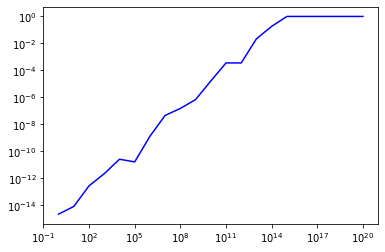

In [6]:
def g(x): 
    return 0.04 / (x * (x + 0.04))

# Calcoliamo l'errore relativo di f(x) rispetto alla formula equivalente ma numericamente stabile g(x)
Erelx = np.abs(f(x) - g(x)) / np.abs(g(x))
print("Errore relativo ", Erelx)
plt.loglog(x, Erelx, 'b-')
